- Setup TensorFlow Object Detection API: Install TensorFlow and the Object Detection API.
- Load a Pre-Trained Object Detection Model: Use MobileNet SSD.
- Run Object Detection: Detect objects in images and count the number of detected objects.

In [4]:
pip install tensorflow tensorflow-hub tensorflow-object-detection-api


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.2/769.2 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.6 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844487 sha256=4c849652e1f4f9398531dbdb9b7e79f3e9032343a460238dfad8a70b02379774
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api
  Attempting uninstall: docut

In [10]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained MobileNet SSD model from TensorFlow Hub
model = hub.load('https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2')

# Path to the locally saved COCO label map file
labels_path = '/content/mscoco_label_map.pbtxt'

# Load label map data for COCO dataset
with open(labels_path, 'r') as f:
    labels = [line.strip() for line in f.readlines()]

# Remove empty labels
labels = list(filter(None, labels))

def load_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (320, 320))
    image_np = np.array(image_resized)  # Remove / 255.0 here
    return image_np, image

def draw_boxes(image, boxes, class_names, scores, min_score_thresh=0.5):
    for box, class_name, score in zip(boxes, class_names, scores):
        if score >= min_score_thresh:
            y1, x1, y2, x2 = box
            y1, x1, y2, x2 = int(y1 * image.shape[0]), int(x1 * image.shape[1]), int(y2 * image.shape[0]), int(x2 * image.shape[1])
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f'{class_name}: {int(score * 100)}%'
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image

def detect_objects(model, image_path):
    image_np, image = load_image(image_path)
    input_tensor = tf.convert_to_tensor(image_np, dtype=tf.uint8)  # Change dtype to uint8
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = model(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}

    boxes = detections['detection_boxes']
    classes = detections['detection_classes'].astype(np.int64)
    scores = detections['detection_scores']

    # Filter detections by score
    detection_boxes = boxes[scores >= 0.5]
    detection_classes = classes[scores >= 0.5]
    detection_scores = scores[scores >= 0.5]

    detection_class_names = [labels[c] for c in detection_classes]

    # Draw boxes on the image
    image_with_boxes = draw_boxes(image, detection_boxes, detection_class_names, detection_scores)

    # Count detected objects
    object_count = len(detection_boxes)

    return image_with_boxes, object_count







In [15]:
# Example usage
image_path = '/content/496012138.jpg'
image_with_boxes, object_count = detect_objects(model, image_path)

print(f'Number of objects detected: {object_count}')



Number of objects detected: 6


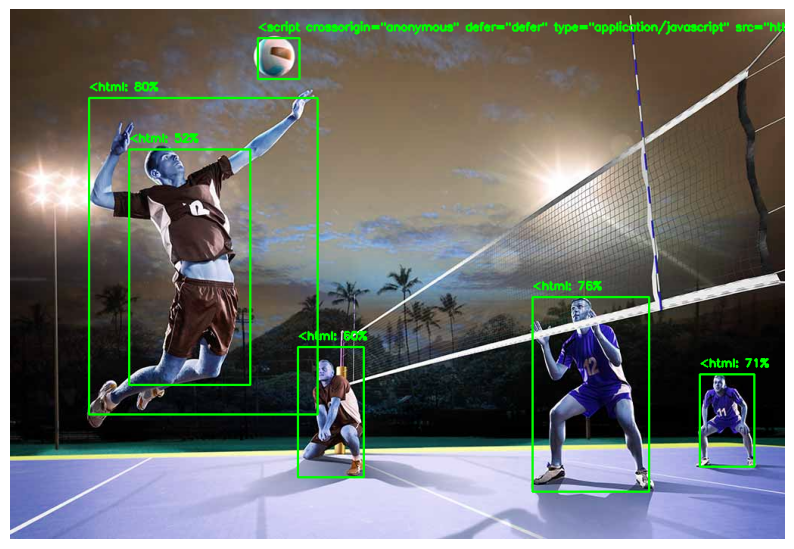

In [16]:
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show();

In [21]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained MobileNet SSD model from TensorFlow Hub
model = hub.load('https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2')

# Path to the locally saved COCO label map file
labels_path = '/content/mscoco_label_map.pbtxt'

# Load label map data for COCO dataset
with open(labels_path, 'r') as f:
    labels = [line.strip() for line in f.readlines()]

# Remove empty labels
labels = list(filter(None, labels))

def load_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (320, 320))
    image_np = np.array(image_resized)  # Remove / 255.0 here
    return image_np, image

def draw_boxes(image, boxes, class_names, scores, min_score_thresh=0.5):
    for box, class_name, score in zip(boxes, class_names, scores):
        if score >= min_score_thresh:
            y1, x1, y2, x2 = box
            y1, x1, y2, x2 = int(y1 * image.shape[0]), int(x1 * image.shape[1]), int(y2 * image.shape[0]), int(x2 * image.shape[1])
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f'{class_name}: {int(score * 100)}%'
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image

def detect_objects(model, image_path):
    image_np, image = load_image(image_path)
    input_tensor = tf.convert_to_tensor(image_np, dtype=tf.uint8)  # Change dtype to uint8
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = model(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}

    boxes = detections['detection_boxes']
    classes = detections['detection_classes'].astype(np.int64)
    scores = detections['detection_scores']

    # Filter detections by class 'sports ball' (class ID 33 in COCO dataset)
    ball_boxes = []
    ball_scores = []
    for i in range(len(scores)):
        if classes[i] == 37 and scores[i] >= 0.5:  # Class ID 33 is 'sports ball'
            ball_boxes.append(boxes[i])
            ball_scores.append(scores[i])

    # Convert lists to numpy arrays
    ball_boxes = np.array(ball_boxes)
    ball_scores = np.array(ball_scores)

    # Draw boxes on the image for balls
    image_with_boxes = draw_boxes(image, ball_boxes, ['ball']*len(ball_boxes), ball_scores)  # Label as 'ball' for visualization

    # Count detected balls
    ball_count = len(ball_boxes)

    return image_with_boxes, ball_count

In [22]:
# Example usage
image_path = '/content/496012138.jpg'
image_with_boxes, object_count = detect_objects(model, image_path)

print(f'Number of objects detected: {object_count}')


Number of objects detected: 1


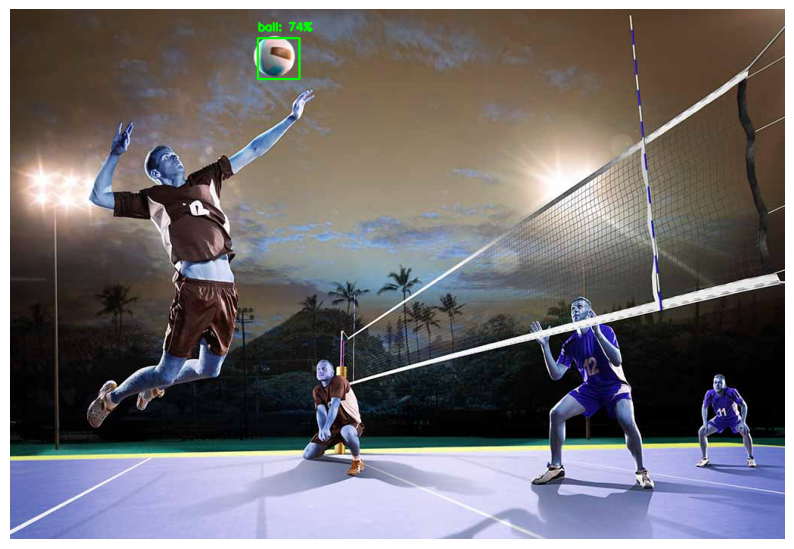

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show();